<a href="https://colab.research.google.com/github/skmerick/ifood/blob/main/Notebook/Aprendizagem_Supervisionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto - Parte 2 - Aprendizagem Supervisionada - Classificação - Exercícios


--- 
<img align="center" width="150" src="https://logodownload.org/wp-content/uploads/2017/05/ifood-logo-0.png">



## Definição do Problema

O departamento de CRM/Marketing do iFood fez uma solicitação para o time de Ciência de Dados (que estão atrelados ao time de dados dentro da área de TI) para criar um modelo de Machine Learning para prever os clientes que darão Churn.


O objetivo deles com o modelo é atuar sobre os clientes com maiores chances de darem churn no próximo mês.

- A ação será realizada 1 vez por mês, todo dia 01.
- Como a frequência de compras dos clientes do IFood é relativamente alta, então ficou-se decidido na reunião com a área cliente que o modelo seria construído usando features construídas em um período fechado de 1 mês para prever se um dado cliente irá deixar de comprar (churn) no próximo mês. 

A métrica principal de avaliação do modelo é a AUC, dado que o score gerado pelo modelo será usado para ordenar a base.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd

## Lendos os Dados

In [ ]:
df_orders = pd.read_csv('/content/drive/MyDrive/projeto-ia-datasets/ifood/df_orders.csv')

In [ ]:
df_orders.head()

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,scheduled_creation_date_local,device_app_version,device_type,device_platform,payment_method,customer_state_label,customer_city,customer_district,customer_centroid_id,customer_has_plus,customer_seg_status_last_month,customer_seg_recency_bucket,customer_seg_frequency_bucket,customer_seg_merchant_offer_bucket,customer_seg_benefits_sensitivity_bucket,customer_seg_marlin_tag,customer_seg_gross_income_bucket,customer_seg_preferred_shift,frn_id,merchant_city,merchant_district,merchant_centroid_id,merchant_dish_type,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11T13:22:06.497Z,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,2019-12-11T13:22:06.497Z,9.29.1,MOBILE,ANDROID,CC_ONLINE,RN,PARNAMIRIM,NOVA PARNAMIRIM,-5.89-35.2,False,Active,1.0,5.0,5.0,Alta,NaN,6.0,NaN,43583,NATAL,PONTA NEGRA,-5.87-35.18,Comida Brasileira,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06T17:57:17.967Z,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,2019-11-06T17:57:17.967Z,webapp_6.2.0,SITE,DESKTOP,CC_ONLINE,PR,LONDRINA,Gleba Fazenda Palhano,-23.33-51.19,False,Active,1.0,4.0,5.0,Media,1. Marlin,6.0,NaN,533415,LONDRINA,Gleba Fazenda Palhano,-23.34-51.19,Lanches,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11T20:42:32.058Z,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,2019-06-11T20:42:32.058Z,iOS_iFood_9.2.1,MOBILE,IOS,CC_ONLINE,SP,SAO PAULO,Jardim Santa Cruz (sacoma),-23.64-46.59,NaN,Active,1.0,5.0,5.0,Media,1. Marlin,6.0,5. Jantar,166370,SAO PAULO,Parque Bristol,-23.64-46.61,Comida Brasileira,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...
3,34a60e0d-0042-49af-9aa8-4dc526a998c2,679245732,2019-06-05T19:16:42.111Z,weekday dinner,2019-06-05T21:17:13.264Z,58.90,4.0,54.9,DELIVERY,False,2019-06-05T19:16:42.111Z,iOS_iFood_9.2.1,MOBILE,IOS,CC_ONLINE,PR,LONDRINA,Centro,-23.31-51.17,NaN,Active,1.0,4.0,5.0,Media,1. Marlin,6.0,5. Jantar,178646,LONDRINA,Centro,-23.31-51.17,Lanches,441.677507,0.0,1.0,0.0,9.0,2.0,2019-06-05T00:00:00.000Z,1,93f66506-a8ba-4c22-97ea-7489131958bb,ac89a3eb35853705a09d54f1e5988ad876628b986045cd...
4,998f6d97-f884-40ba-a7a3-e9691930a642,1052187003,2019-10-15T21:01:23.973Z,weekday dinner,2019-10-15T23:01:41.146Z,54.80,14.0,50.8,DELIVERY,False,2019-10-15T21:01:23.973Z,Android_iFood_9.22.1,MOBILE,ANDROID,CC_ONLINE,SP,SAO PAULO,Parque Panamericano,-23.45-46.73,False,Active,2.0,4.0,4.0,Media,1. Marlin,6.0,NaN,77662,SAO PAULO,Jardim Santo Elias,-23.48-46.74,Comida Japonesa,4398.730930,1.0,0.0,2.0,3.0,4.0,2019-10-15T00:00:00.000Z,1,515a402d-8b86-4e6d-9852-f02282736781,fdef6bf0530b1f6507f175167aa442ade79b6e6fa085c9...


## Análise Exploratória (1 ponto)

**<span style="color:blue">(0.25 ponto)</span> `Q1`** Quantas linhas e colunas existem na base `df_orders`?

In [ ]:
df_orders.shape

(492138, 43)

**<span style="color:blue">(0.25 ponto)</span> `Q2`** Verifique se todos os pedidos são unicos.

In [ ]:
df_orders['order_id'].nunique()
#São pedidos unicos pois o numero de linhas corresponde ao numero de pedidos unicos

492138

**<span style="color:blue">(0.25 ponto)</span> `Q3`** Qual o pedido mais antigo e o mais recente da base? Utilize a variável `order_timestamp_local`.

In [ ]:
df_orders.agg({'order_timestamp_local': ['min', 'max']})

,order_timestamp_local
min,2019-06-01T00:00:15.369Z
max,2019-12-31T23:31:59.972Z


**<span style="color:blue">(0.25 ponto)</span> `Q4`** Quantos usuários únicos existem na base?

In [ ]:
df_orders['customer_id'].nunique()

30079

## Criação da ABT (10 pontos)

Será que variáveis como Recência, Frequência e Valor podem nos ajudar a prever se um dado cliente irá realizar um novo pedido no próximo mês?

Vamos criar variáveis que descrevem o comportamento do cliente com base em 1 mês e usar essas variáveis para prever se o cliente irá comprar no próximo mês (caso em que acontecerá um churn e talvez seja interessante oferecermos um cupom de desconto através de notificações no app).

**<span style="color:blue">(1.0 ponto)</span> `Q5`** Crie um DataFrame chamado `df_features_train` que deverá conter os dados do período 2019-06-01 (inclusivo) até 2019-07-01 (exclusivo), ou seja deve conter somente os dados referente ao mês 6.

In [ ]:
df_features_train=(
    df_orders
        .query('order_timestamp_local < "2019-07-01"')
)
df_features_train.head()

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,scheduled_creation_date_local,device_app_version,device_type,device_platform,payment_method,customer_state_label,customer_city,customer_district,customer_centroid_id,customer_has_plus,customer_seg_status_last_month,customer_seg_recency_bucket,customer_seg_frequency_bucket,customer_seg_merchant_offer_bucket,customer_seg_benefits_sensitivity_bucket,customer_seg_marlin_tag,customer_seg_gross_income_bucket,customer_seg_preferred_shift,frn_id,merchant_city,merchant_district,merchant_centroid_id,merchant_dish_type,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11T20:42:32.058Z,weekday dinner,2019-06-11T22:42:54.005Z,53.8,4.0,49.8,DELIVERY,False,2019-06-11T20:42:32.058Z,iOS_iFood_9.2.1,MOBILE,IOS,CC_ONLINE,SP,SAO PAULO,Jardim Santa Cruz (sacoma),-23.64-46.59,NaN,Active,1.0,5.0,5.0,Media,1. Marlin,6.0,5. Jantar,166370,SAO PAULO,Parque Bristol,-23.64-46.61,Comida Brasileira,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...
3,34a60e0d-0042-49af-9aa8-4dc526a998c2,679245732,2019-06-05T19:16:42.111Z,weekday dinner,2019-06-05T21:17:13.264Z,58.9,4.0,54.9,DELIVERY,False,2019-06-05T19:16:42.111Z,iOS_iFood_9.2.1,MOBILE,IOS,CC_ONLINE,PR,LONDRINA,Centro,-23.31-51.17,NaN,Active,1.0,4.0,5.0,Media,1. Marlin,6.0,5. Jantar,178646,LONDRINA,Centro,-23.31-51.17,Lanches,441.677507,0.0,1.0,0.0,9.0,2.0,2019-06-05T00:00:00.000Z,1,93f66506-a8ba-4c22-97ea-7489131958bb,ac89a3eb35853705a09d54f1e5988ad876628b986045cd...
5,0d8b3571-be59-48c0-bb92-b7f3ce2793a0,686714753,2019-06-08T14:44:02.062Z,weekend lunch,2019-06-08T15:25:13.583Z,131.9,4.0,127.9,DELIVERY,False,2019-06-08T14:44:02.062Z,iOS_iFood_8.54.1,MOBILE,IOS,CC_ONLINE,DF,BRASILIA,Setor De Habitacoes Individuais Sul,-15.84-47.84,NaN,Active,1.0,5.0,5.0,Media,1. Marlin,6.0,5. Jantar,180004,BRASILIA,Vila Planalto,-15.79-47.85,Doces & Bolos,5891.546259,0.0,18.0,0.0,2.0,3.0,2019-06-08T00:00:00.000Z,1,0260bfa3-e8e4-4b62-9500-5529600dc309,45751a4f75fbd494aa7e275932ab0791b1542ea30df8ff...
13,4511884b-ac72-44c2-9321-eb59e93dca45,690050151,2019-06-10T00:41:14.558Z,weekend dawn,2019-06-10T06:48:56.869Z,46.8,4.0,42.8,DELIVERY,False,2019-06-10T00:41:14.558Z,iOS_iFood_9.2.1,MOBILE,IOS,CC_ONLINE,SP,SAO PAULO,Vila Clementino,-23.6-46.65,NaN,Active,1.0,4.0,5.0,Alta,1. Marlin,6.0,NaN,39607,SAO PAULO,Vila Mariana,-23.6-46.63,Pizza,1781.144782,1.0,1.0,1.0,2.0,10.0,2019-06-10T00:00:00.000Z,1,4e0bfb70-5bde-4f74-8865-c67c83012c76,6cf18243f88c0e11fbd53d802282b299e76def34285cf8...
18,6f1d4815-206d-419c-8339-cef30c5f55d6,723621544,2019-06-22T16:02:59.896Z,weekend snack,2019-06-22T16:16:00.950Z,28.9,4.0,24.9,DELIVERY,False,2019-06-22T16:02:59.896Z,iOS_iFood_9.5.0,MOBILE,IOS,CC_ONLINE,AL,MACEIO,Antares,-9.59-35.74,NaN,Resurrected,2.0,1.0,5.0,Media,4. Retention Carp,6.0,4. Lanche da Tarde,272162,MACEIO,Antares,-9.57-35.74,Açaí,2577.909442,1.0,0.0,1.0,4.0,1.0,2019-06-22T00:00:00.000Z,1,aa49e3b1-2a75-4336-b4f7-3e1021afd056,6b043c9c3e7398a1bfd27cf9b8f1b28af1302e2911a0ef...


**<span style="color:blue">(1.0 ponto)</span> `Q6`** Crie um DataFrame chamado `df_target_train` que deverá conter os dados do período 2019-07-01 (inclusivo) até 2019-08-01 (exclusivo), ou seja deve conter somente os dados referente ao mês 7.

Depois selecione apenas a coluna `customer_id` e remova os duplicados.

In [ ]:
df_target_train=(
    df_orders
        .query('order_timestamp_local >= "2019-07-01" & order_timestamp_local < "2019-08-01"')
        .filter(['customer_id'])
        .drop_duplicates()
)
df_target_train.head()

,customer_id
8,90f2b3ba9e0f08ee3183d6d918fb53e6534dbb600ec455...
17,15d5dbfca76a09718f673a21fa83ca91ea29cd844303b8...
22,4311cabf116b98af5288a4e67b08d4cd3a7fa8bcc9b51c...
25,1b256748d9f3c0a9cdb0d8eb0c0b8c49dd31649fdd7d6d...
29,d109c64ce2bc5339a6beea5db875d7da662fddf1e21bc1...


**<span style="color:blue">(2.0 ponto)</span> `Q7`** Faça o agrupamento no DataFrame `df_features_train` pela feature `customer_id`. Faça as agregações abaixo, renomeando o resultado para as seguintes colunas `receita_1m`, `qtde_pedidos_1m` e `data_ultima_venda`, respectivamente.

- 'paid_amount' - 'sum'
- 'order_id' - 'nunique'
- 'order_timestamp_local' - 'max'

Lembre-se de utilizar o conceito que vimos em sala para renomear o resultado da agregação.

Também utilize o método `reset_index` para reinicar os indices.

Salve na variável `df_abt_train`.

In [ ]:
df_abt_train=(
    df_features_train
    .groupby('customer_id')
    .agg(
         receita_1m = ('paid_amount', 'sum'),
         qtde_pedidos_1m = ('order_id', 'nunique'),
         data_ultima_venda = ('order_timestamp_local', 'max')  
).reset_index()
)
df_abt_train.head()

,customer_id,receita_1m,qtde_pedidos_1m,data_ultima_venda
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,102.0,2,2019-06-15T21:57:51.803Z
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,52.0,1,2019-06-11T12:10:33.822Z
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,59.3,1,2019-06-01T12:45:14.808Z
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,95.2,2,2019-06-29T02:56:33.535Z
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,27.0,1,2019-06-17T19:41:34.313Z


**<span style="color:blue">(3.0 pontos)</span> `Q8`** Utilize o método `.assign` do DataFrame para fazer as seguintes alterações:

- Altere o tipo da coluna `data_ultima_venda` para o formato de data utilizando o comando `pd.to_datetime` com o parâmetro `utc=True`.
- Crie uma nova coluna chamada `data_ref` com o valor de `2019-07-01` e faça a converção utilizando o comando `pd.to_datetime` com o parâmetro `utc=True`
- Crie uma nova coluna chamada `recencia` e salve os dias referentes a subtração da coluna `data_ref` e `data_ultima_venda`. Lembre-se de extrair os dias (`.dt.days`)
- Por fim, selecione apenas as seguintes colunas: `['data_ref', 'customer_id', 'receita_1m', 'qtd_pedidos_1m', 'recencia']`

O resultado dessas alterações devem ser salvas na variável `df_abt_train`


In [ ]:
df_abt_train['data_ultima_venda'] = pd.to_datetime(df_abt_train['data_ultima_venda'], utc=True)
df_abt_train=(
    df_abt_train
    .assign(data_ref = pd.to_datetime('2019-07-01', utc=True))
    .assign(recencia = lambda df_em_memoria: (df_em_memoria['data_ref'] - df_em_memoria['data_ultima_venda']).dt.days)
    .filter(['data_ref','customer_id', 'receita_1m', 'qtde_pedidos_1m','recencia'])
)
df_abt_train.head()

,data_ref,customer_id,receita_1m,qtde_pedidos_1m,recencia
0,2019-07-01 00:00:00+00:00,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,102.0,2,15
1,2019-07-01 00:00:00+00:00,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,52.0,1,19
2,2019-07-01 00:00:00+00:00,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,59.3,1,29
3,2019-07-01 00:00:00+00:00,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,95.2,2,1
4,2019-07-01 00:00:00+00:00,00081913eb21cd12aecc831bda704f8c6482723b55e664...,27.0,1,13


**<span style="color:blue">(1.0 pontos)</span> `Q9`** Faça o `merge` com o DataFrame `df_abt_train` com o `df_target_train` com os seguintes parametros:

- `how='left'`
- `on='customer_id'`
- `indicator=True`

Salve o merge na variável `df_abt_train`.


In [ ]:
df_abt_train =(
    df_abt_train
    .merge(df_target_train, how='left', on='customer_id', indicator=True)
)
df_abt_train.head()

,data_ref,customer_id,receita_1m,qtde_pedidos_1m,recencia,_merge
0,2019-07-01 00:00:00+00:00,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,102.0,2,15,left_only
1,2019-07-01 00:00:00+00:00,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,52.0,1,19,left_only
2,2019-07-01 00:00:00+00:00,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,59.3,1,29,left_only
3,2019-07-01 00:00:00+00:00,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,95.2,2,1,left_only
4,2019-07-01 00:00:00+00:00,00081913eb21cd12aecc831bda704f8c6482723b55e664...,27.0,1,13,left_only


**<span style="color:blue">(1.0 pontos)</span> `Q10`** Utilize o método `.assign` para criar a coluna `churn_next_month`.

Utilize a função `np.where` para fazer a criação. Compare as colunas `_merge` com `left_only`, se ambas forem iguais, o resultado deve ser 1, caso contrário deve ser 0.

* Obs: não esquecer de dropar a coluna `_merge` depois de ter criado a variável target.

In [ ]:
df_abt_train =(
    df_abt_train
    .assign(churn_next_month = lambda df: np.where(df['_merge'] == "left_only", 1, 0))
    .filter(['data_ref','customer_id', 'receita_1m', 'qtde_pedidos_1m','recencia','churn_next_month'])
)
    
df_abt_train.head()

,data_ref,customer_id,receita_1m,qtde_pedidos_1m,recencia,churn_next_month
0,2019-07-01 00:00:00+00:00,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,102.0,2,15,1
1,2019-07-01 00:00:00+00:00,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,52.0,1,19,1
2,2019-07-01 00:00:00+00:00,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,59.3,1,29,1
3,2019-07-01 00:00:00+00:00,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,95.2,2,1,1
4,2019-07-01 00:00:00+00:00,00081913eb21cd12aecc831bda704f8c6482723b55e664...,27.0,1,13,1


**<span style="color:blue">(1.0 pontos)</span> `Q11`** Verifique a distribuição da coluna `churn`.

In [ ]:
df_abt_train['churn_next_month'].value_counts(normalize=True)

0    0.613086
1    0.386914
Name: churn_next_month, dtype: float64

<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" /> &nbsp; **CHECKPOINT** - O DataFrame `df_abt_train` deverá conter exatamente `(30079, 6)`. E a distribuição da variável target deve ser `0.613086` para não-churn (0) e `0.386914` para churn (1).

# Modelagem (14 pontos)

**<span style="color:blue">(2 pontos)</span> `Q12`** Crie uma ABT Out of Time avançando 1 mês no código anterior. Porque devemos criar uma ABT Out of Time?

Utilize o mês 08 para criar essa ABT.

In [ ]:
df_features_oot=(
    df_orders
        .query('order_timestamp_local >= "2019-07-01" & order_timestamp_local < "2019-08-01"')
)
df_target_oot=(
    df_orders
        .query('order_timestamp_local >= "2019-08-01" & order_timestamp_local < "2019-09-01"')
        .filter(['customer_id'])
        .drop_duplicates()
)


df_abt_oot=(
    df_features_oot
    .groupby('customer_id')
    .agg(
         receita_1m = ('paid_amount', 'sum'),
         qtde_pedidos_1m = ('order_id', 'nunique'),
         data_ultima_venda = ('order_timestamp_local', 'max')  
).reset_index()
)


df_abt_oot['data_ultima_venda'] = pd.to_datetime(df_abt_oot['data_ultima_venda'], utc=True)
df_abt_oot=(
    df_abt_oot
    .assign(data_ref = pd.to_datetime('2019-08-01', utc=True))
    .assign(recencia = lambda df_em_memoria: (df_em_memoria['data_ref'] - df_em_memoria['data_ultima_venda']).dt.days)
    .filter(['data_ref','customer_id', 'receita_1m', 'qtde_pedidos_1m','recencia'])
)

df_abt_oot =(
    df_abt_oot
    .merge(df_target_oot, how='left', on='customer_id', indicator=True)
)


df_abt_oot =(
    df_abt_oot
    .assign(churn_next_month = lambda df: np.where(df['_merge'] == "left_only", 1, 0))
    .filter(['data_ref','customer_id', 'receita_1m', 'qtde_pedidos_1m','recencia','churn_next_month'])
)
    
df_abt_oot.shape

(18441, 6)

In [ ]:
df_abt_oot.head()

,data_ref,customer_id,receita_1m,qtde_pedidos_1m,recencia,churn_next_month
0,2019-08-01 00:00:00+00:00,000a1fac4f7a67cc3f2e7667167597cb2c9a1b9edafe18...,85.89,3,11,0
1,2019-08-01 00:00:00+00:00,0014b7013c66a05d0b5ce0687d614ac220d3ae1af398d2...,211.96,5,11,0
2,2019-08-01 00:00:00+00:00,00150a9d8edc32b5ac2c1a8089e5615dbd297cea2c6cba...,164.60,2,14,0
3,2019-08-01 00:00:00+00:00,00197c67cab97917c3e147877fc36ae9e9208f4bd578ca...,196.20,5,2,0
4,2019-08-01 00:00:00+00:00,001b8d424e1aa9b762831ccce74a6b4c648a83f2d8a239...,238.68,8,0,0


In [ ]:
df_abt_oot['churn_next_month'].value_counts(normalize=True)

0    0.759558
1    0.240442
Name: churn_next_month, dtype: float64

<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" /> &nbsp; **CHECKPOINT** - O DataFrame `df_abt_oot` deverá conter exatamente `(18441, 6)`. E a distribuição da variável target deve ser `0.759558` para não-churn (0) e `0.240442` para churn (1).

**<span style="color:blue">(1 ponto)</span> `Q13`** Faça um estudo de valores faltantes tanto na `df_abt_train` e `df_abt_oot`. 

In [ ]:
df_abt_train.isnull().sum()

data_ref            0
customer_id         0
receita_1m          0
qtde_pedidos_1m     0
recencia            0
churn_next_month    0
dtype: int64

In [ ]:
df_abt_oot.isnull().sum()

data_ref            0
customer_id         0
receita_1m          0
qtde_pedidos_1m     0
recencia            0
churn_next_month    0
dtype: int64

**<span style="color:blue">(1 ponto)</span> `Q14`**  Treine uma árvore de decisão na base de treino usando Stratified K-Fold e avalie utilizando a métrica **AUC** na base Out of Time.

Utilize o parametro `random_state=42`

In [ ]:
!pip install feature-engine==1.0.2

     |████████████████████████████████| 152 kB 7.7 MB/s 
     |████████████████████████████████| 9.8 MB 52.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from feature_engine.imputation import ArbitraryNumberImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Utilize as seguintes variáveis:
target = 'churn_next_month'

key_vars = ['data_ref', 'customer_id']
num_vars = ['receita_1m', 'qtde_pedidos_1m', 'recencia']
cat_vars = [] # não temos variáveis categóricas
features = num_vars + cat_vars

X_train = df_abt_train[features]
y_train = df_abt_train[target]

X_oot = df_abt_oot[features]
y_oot = df_abt_oot[target]

In [ ]:
def avaliar_tecnica(cv_results):
  mean_accuracy = np.array(cv_results).mean()
  std_accuracy  = np.array(cv_results).std()
  print(f"Acurácia Média com CV: {mean_accuracy:.3f}")
  print(f"Desvio-Padrão com CV: {std_accuracy:.3f}")

In [ ]:
from sklearn.model_selection import StratifiedKFold

dt_pipeline = Pipeline(steps=[
                ('DTC', DecisionTreeClassifier(random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_resultados = cross_val_score(estimator=dt_pipeline, X=X_train, y=y_train, cv=skf, scoring='roc_auc')
print(cv_resultados)
print(cv_resultados.mean())
print(avaliar_tecnica(cv_resultados))

[0.61400277 0.60508349 0.60132891 0.6330274  0.6202931 ]
0.6147471340887323
Acurácia Média com CV: 0.615
Desvio-Padrão com CV: 0.011
None


In [ ]:
dt_pipeline.fit(X_train, y_train)
y_proba= dt_pipeline.predict_proba(X_oot)[:,1]
roc_auc_score(y_oot,y_proba)

0.5942238945608709

In [ ]:
dt_pipeline.predict(X_oot)

array([1, 0, 1, ..., 1, 1, 1])

**<span style="color:blue">(1 ponto)</span> `Q15`** Treine uma Random Forest na base de treino usando Stratified K-Fold e avalie utilizando a métrica **AUC** na base Out of Time.

Utilize o parametro `random_state=42`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
                ('random_forest', RandomForestClassifier(random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_resultados = cross_val_score(estimator=rf_pipeline, X=X_train, y=y_train, cv=skf, scoring='roc_auc')
print(cv_resultados)
print(cv_resultados.mean())
print(avaliar_tecnica(cv_resultados))

[0.67901574 0.67208861 0.6670183  0.68945021 0.68106308]
0.677727188074699
Acurácia Média com CV: 0.678
Desvio-Padrão com CV: 0.008
None


In [ ]:
rf_pipeline.fit(X_train, y_train)
y_proba= rf_pipeline.predict_proba(X_oot)[:,-1]
roc_auc_score(y_oot,y_proba)

0.663481166176368

**<span style="color:blue">(1 ponto)</span> `Q16`** Treine um LGBM na base de treino usando Stratified K-Fold e avalie utilizando a métrica **AUC** na base Out of Time.

In [ ]:
from lightgbm import LGBMClassifier

lgbm_pipeline = Pipeline(steps=[
                ('lgbm', LGBMClassifier(random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_resultados = cross_val_score(estimator=lgbm_pipeline, X=X_train, y=y_train, cv=skf, scoring='roc_auc')
print(cv_resultados)
print(cv_resultados.mean())
print(avaliar_tecnica(cv_resultados))

[0.75074089 0.75289576 0.74385621 0.7594584  0.75306223]
0.752002696969971
Acurácia Média com CV: 0.752
Desvio-Padrão com CV: 0.005
None


In [ ]:
lgbm_pipeline.fit(X_train, y_train)
y_proba= lgbm_pipeline.predict_proba(X_oot)[:,-1]
roc_auc_score(y_oot,y_proba)

0.7330607764614375

**<span style="color:blue">(1 ponto)</span> `Q17`** Para o melhor algoritmo dos 3 treinados anteriormente (lightgbm), faça um GridSearch para encontrar um conjunto de hiperparâmetros mais otimizado (lembre de otimizar a **AUC**).

Utilize os seguintes hiperparâmetros:

    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__learning_rate': [0.01, 0.015, 0.025, 0.05, 0.1],
    'lgbm__n_estimators': [100, 300, 500]

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__learning_rate': [0.01, 0.015, 0.025, 0.05, 0.1],
    'lgbm__n_estimators': [100, 300, 500]
}

grid_search = GridSearchCV(lgbm_pipeline, parameters, scoring='roc_auc', cv=skf, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('lgbm',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.01, 0.015, 0.025, 0.05, 0.1],
                         'lgbm__max_depth': [3, 5, 7, 9],
                         'lgbm__n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [ ]:
# Recupere o melhor AUC
grid_search.best_score_

0.7568980823018885

In [ ]:
# Recupere os hiperparâmetros
grid_search.best_params_

{'lgbm__learning_rate': 0.05, 'lgbm__max_depth': 3, 'lgbm__n_estimators': 100}

In [ ]:
# avaliando a performando do melhor modelo no grid search na base oot
best_model = Pipeline(steps=[
            ('numeric_imputer', ArbitraryNumberImputer()),
            ('lgbm', LGBMClassifier(learning_rate= 0.05, max_depth= 3, n_estimators= 100, random_state=42))
])
best_model.fit(X_train, y_train)
y_proba= best_model.predict_proba(X_oot)[:,-1]
roc_auc_score(y_oot,y_proba)

0.7372138323518183

Talvez ainda haja espaço para melhorias na performance do modelo. Lembrando que temos apenas 3 variáveis: `receita_1m`, `qtd_pedidos_1m` e `recencia`. 

Vamos utilizar a variável `order_shift` para criar mais 10 features para verificar se isso irá ajudar o modelo de Machine Learning a predizer qual cliente irá dar **churn**.

**<span style="color:blue">(1 ponto)</span> `Q18`** Utilize o método `pd.crosstab` com o parâmetro `normalize='index'` nas colunas `customer_id` e `order_shift`. Lembre-se de resetar o indíce.

Salve o resultado no DataFrame `df_customer_order_shift_train`.

Imprima os 5 primeiros elementos desse DataFrame.

In [ ]:
df_customer_order_shift_train =(
    pd.crosstab(df_features_train['customer_id'], df_features_train['order_shift'], normalize='index')
).reset_index()

df_customer_order_shift_train.head(5)
    

order_shift,customer_id,weekday breakfast,weekday dawn,weekday dinner,weekday lunch,weekday snack,weekend breakfast,weekend dawn,weekend dinner,weekend lunch,weekend snack
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**<span style="color:blue">(1 ponto)</span> `Q19`** Faça o merge com a `df_abt_train` com os seguintes parâmetros:

- `how='left'`
- `on='customer_id'`

Salve o DataFrame resultante na mesma variável `df_abt_train`.

Imprima as 5 primeiras linhas.

In [ ]:
df_abt_train =(
    df_abt_train
    .merge(df_customer_order_shift_train, how='left', on='customer_id')
)
df_abt_train.head(5)

,data_ref,customer_id,receita_1m,qtde_pedidos_1m,recencia,churn_next_month,weekday breakfast,weekday dawn,weekday dinner,weekday lunch,weekday snack,weekend breakfast,weekend dawn,weekend dinner,weekend lunch,weekend snack
0,2019-07-01 00:00:00+00:00,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,102.0,2,15,1,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0
1,2019-07-01 00:00:00+00:00,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,52.0,1,19,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-01 00:00:00+00:00,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,59.3,1,29,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2019-07-01 00:00:00+00:00,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,95.2,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0
4,2019-07-01 00:00:00+00:00,00081913eb21cd12aecc831bda704f8c6482723b55e664...,27.0,1,13,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**<span style="color:blue">(1 ponto)</span> `Q20`** Replique essas duas etapas para a base de OOT.

- Crie o DataFrame `df_customer_order_shift_oot` utilizando o comando `pd.crosstab` com o parâmetro `normalize='index'`. Lembre-se de resetar o indice.

- Faça o merge com a `df_abt_oot` com os parâmetros `how='left'` e `on='customer_id'`.

- Imprime as 5 primeiras linhas do `df_abt_oot`.


In [ ]:
df_customer_order_shift_oot =(
    pd.crosstab(df_features_oot['customer_id'], df_features_oot['order_shift'], normalize='index')
).reset_index()

df_abt_oot =(
    df_abt_oot
    .merge(df_customer_order_shift_oot, how='left', on='customer_id')
)
    
df_abt_oot.head(5)


,data_ref,customer_id,receita_1m,qtde_pedidos_1m,recencia,churn_next_month,weekday breakfast,weekday dawn,weekday dinner,weekday lunch,weekday snack,weekend breakfast,weekend dawn,weekend dinner,weekend lunch,weekend snack
0,2019-08-01 00:00:00+00:00,000a1fac4f7a67cc3f2e7667167597cb2c9a1b9edafe18...,85.89,3,11,0,0.0,0.0,0.666667,0.0,0.000,0.0,0.0,0.333333,0.0,0.000
1,2019-08-01 00:00:00+00:00,0014b7013c66a05d0b5ce0687d614ac220d3ae1af398d2...,211.96,5,11,0,0.0,0.0,0.400000,0.0,0.000,0.0,0.0,0.600000,0.0,0.000
2,2019-08-01 00:00:00+00:00,00150a9d8edc32b5ac2c1a8089e5615dbd297cea2c6cba...,164.60,2,14,0,0.0,0.0,0.000000,0.5,0.000,0.0,0.0,0.500000,0.0,0.000
3,2019-08-01 00:00:00+00:00,00197c67cab97917c3e147877fc36ae9e9208f4bd578ca...,196.20,5,2,0,0.0,0.0,0.800000,0.0,0.000,0.0,0.0,0.000000,0.0,0.200
4,2019-08-01 00:00:00+00:00,001b8d424e1aa9b762831ccce74a6b4c648a83f2d8a239...,238.68,8,0,0,0.0,0.0,0.250000,0.5,0.125,0.0,0.0,0.000000,0.0,0.125


Criamos mais 10 variáveis tanto na ABT de treino quanto na de teste (OOT). Essas variáveis indicam o percentual de pedidos realizados por cada usuário em um horário específico do dia.

- weekday breakfast
- weekday dawn
- weekday dinner
- weekday lunch
- weekday snack
- weekend breakfast
- weekend dawn
- weekend dinner
- weekend lunch
- weekend snack

In [ ]:
df_abt_train.shape, df_abt_oot.shape

((30079, 16), (18441, 16))

**<span style="color:blue">(1 ponto)</span> `Q21`** Temos 13 features, e talvez algumas delas não possuam valor preditivo. Utilize o melhor algoritmo testado até agora, treine e avalie utilizando a métrica **AUC**.

In [ ]:
# Utilize as seguintes variáveis:
target = 'churn_next_month'
num_vars = ['receita_1m', 'qtde_pedidos_1m', 'recencia', 
            'weekday breakfast', 'weekday dawn', 'weekday dinner', 'weekday lunch', 'weekday snack',
            'weekend breakfast', 'weekend dawn', 'weekend dinner', 'weekend lunch', 'weekend snack']
cat_vars = []
features = num_vars + cat_vars

X_train = df_abt_train[features]
y_train = df_abt_train[target]

X_oot = df_abt_oot[features]
y_oot = df_abt_oot[target]

best_model2 = Pipeline(steps=[
                ('lgbm', LGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=100, random_state=42))
])
best_model2.fit(X_train, y_train)

y_proba= best_model2.predict_proba(X_oot)[:,-1]
roc_auc_score(y_oot,y_proba)


0.7362892591979673

**<span style="color:blue">(1 ponto)</span> `Q22`** Houve melhora em relação ao modelo anterior?

In [ ]:
###Não, não houve melhora ao modelo anterior, pois o roc_auc_score diminuiu em relação ao modelo com menos variaveis.

**<span style="color:blue">(1 ponto)</span> `Q23`** Qual foi o melhor modelo encontrado e quais as features utilizadas?

In [ ]:
###'lgbm', LGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=100, random_state=42
###'receita_1m', 'qtde_pedidos_1m', 'recencia'

### O melhor modelo foi utilizando o LGBMClassifier, com os paramentros learning_rate 0.05, max_depth 3, n_estimators 100 e utilizando as features receita_1m, qtde_pedidos_1m e recencia.

**<span style="color:blue">(1 ponto)</span> `Q24`** Rode o shap values para entender quais as variáveis mais importantes do modelo e como elas se relacionam com a variável target (código já está disponível, basta apenas executar e interpretar para responder as perguntas abaixo).

**Responda:**

- **Qual a variável mais importante?** 
- **Como ela se relaciona com a variável target?** 
- **Como as outras variáveis se relacionam com a variável target?**

In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 8.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509240 sha256=eb5c595dbb9154f6cc986ac722bab1fed8921a915c130d25197aabb7a3b0fcc9
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
features = ['receita_1m', 'qtde_pedidos_1m', 'recencia']

X_train = df_abt_train[features]
X_oot   = df_abt_oot[features]

In [ ]:
import shap
explainer = shap.TreeExplainer(best_model[-1])

In [ ]:
X_oot_transformado = best_model[:-1].transform(X_oot)

In [ ]:
shap_values = explainer.shap_values(X_oot_transformado)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


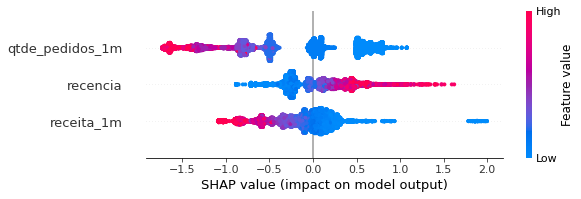

In [ ]:
shap.summary_plot(shap_values[1], X_oot_transformado, plot_type='dot')

**ADICIONE SUAS RESPOSTAS AQUI**

- **Qual a variável mais importante?** 

Podemos considerar a variavel Recencia como a mais importante, pois podemos notar que o seu valor impacta diretamente no shap value.


- **Como ela se relaciona com a variável target?**

Notamos que quanto maior o valor da variavel, mais alto fica o shap value

- **Como as outras variáveis se relacionam com a variável target?**

ao contrario da variavel recencia, as outras variaveis são inversos.
Quanto mais alto o valor, menos SHAP value. Porem podemos notar uma distribuicao menos homogenea.